In [1]:
from corpgame import Game
# create a simple mobility game
game = Game()
# show nash equilibria for starting conditions
game(state=[[3, 0], [1, 2], [2, 1]])
game.payoff


Nash: 000  with payoff  [0, 0, 0]
Nash: 010  with payoff  [1, 0, -1]
Nash: 100  with payoff  [0, 0, 0]


{'000': [0, 0, 0],
 '001': [1, 0, -1],
 '010': [1, 0, -1],
 '011': [2, -1, -1],
 '100': [0, 0, 0],
 '101': [0, 0, 0],
 '110': [-1, 0, 1],
 '111': [0, 0, 0]}

In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_true = np.array([[1,2,3],[1,2,3]])
y_pred = np.array([[1,0.9,4],[1,2,3]])
mse = mean_squared_error(y_true, y_pred, multioutput='raw_values')
print(mse, '=', sum(mse))

[0.    0.605 0.5  ] = 1.105


[array([6, 4, 2]), array([5, 5, 2]), array([4, 5, 3])]


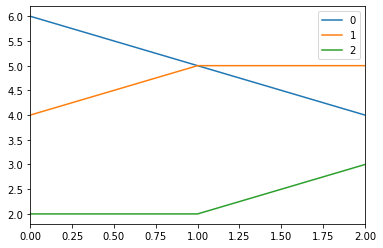

In [37]:
def simulate_step(
    strategy=[1, 1, 0, 0, 0],
    start_population=[[5, 10], [5, 5], [15, 5], [15, 5], [30, 5]]
):
    game = Game()
    population = []
    game(start_population, show_nash=False)
    # game.print()
    game.update_strategies(strategy)
    game.get_state()
    # print(s)
    game.update_strategies(strategy)
    game.round()
    game.get_state()
    state = game.state.transpose()
    return state

population = [[3, 3], [1, 2], [2, 1]]
strategies = [[0,1,0],[0,1,0],[1,1,0]]
population_evolution = []

for strategy in strategies:
    population = simulate_step(strategy=strategy, start_population=list(population))
    #print(population)
    population_evolution.append(np.sum(population, axis=1))
print(population_evolution)
import pandas as pd
pd.DataFrame(population_evolution).plot.line()

[[3 3 3]
 [4 3 2]
 [4 3 2]]


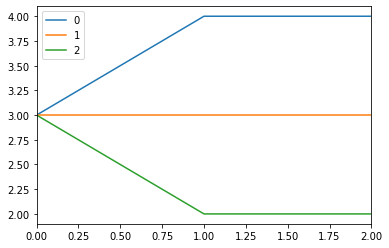

In [17]:
from corpgame import simulate
# simulate 10 rounds with a given strategy
population_evolution = simulate(strategy=[0,1,0], start_population=[[3, 0], [1, 2], [2, 1]], iterations = 2)
# plot
print(population_evolution)
import pandas as pd
pd.DataFrame(population_evolution).plot.line()

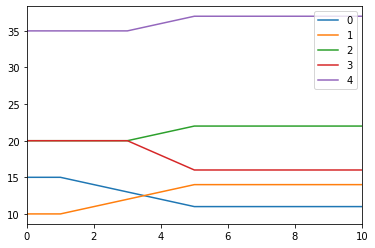

In [66]:
population = simulate(strategy=[0,1,0,1,0])
pd.DataFrame(population).plot.line()

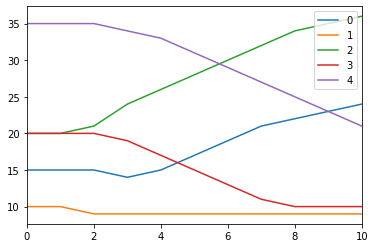

In [67]:
population = simulate(strategy=[0,1,0,1,1])
pd.DataFrame(population).plot.line()

In [6]:
# time execution iteratively by number of players
import random, time
for size in range(3, 100):
    start = time.time()
    population = [[random.randint(0,5),random.randint(0,5)] for i in range(0, size)]
    game = Game()
    game(population, show_nash=False)
    end = time.time()-start
    print(size, end)

3 0.0008804798126220703
4 0.0013201236724853516
5 0.0030183792114257812
6 0.008784055709838867
7 0.025992631912231445
8 0.03695416450500488
9 0.08102822303771973
10 0.18424010276794434
11 0.39885759353637695
12 0.896477222442627
13 2.021888494491577
14 4.515799522399902
15 9.836885213851929
16 20.718082666397095
17 46.46681213378906
18 102.37133288383484


KeyboardInterrupt: 

In [108]:
game = Game()
game.player_generator([[3,0],[1,2],[2,1],[0,0]])
#game.update_strategies([0,1,1,1])
game.get_payoffs()
print('payoff', game.payoff)
game.get_state()
#print('state', game.state)
game.get_nash()
print('nash', game.nash)


[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
payoff {'0000': [0, 0, 0, 0], '0001': [0, -1, -1, 2], '0010': [1, 0, -1, 0], '0011': [1, -1, -1, 1], '0100': [1, 0, -1, 0], '0101': [1, 0, -1, 0], '0110': [2, -1, -2, 1], '0111': [2, -1, -1, 0], '1000': [-1, 0, 0, 1], '1001': [0, -1, 0, 1], '1010': [-1, 0, -1, 2], '1011': [0, 0, 0, 0], '1100': [-2, 0, 1, 1], '1101': [-1, 0, 1, 0], '1110': [-1, -1, -1, 3], '1111': [0, 0, 0, 0]}
nash {'0000': False, '0001': False, '0010': False, '0011': True, '0100': True, '0101': True,

In [96]:
%%time
log.setLevel(logging.DEBUG)
game = Game()
game.player_generator()
game.update_strategies([0,1,1])
for i in range(0,3):
    game.round()
    game.print()
    print('\n')

Player  0 [5, 0]  score  5
Player  1 [0, 2]  score  2
Player  2 [1, 1]  score  2


Player  0 [6, 0]  score  6
Player  1 [0, 2]  score  2
Player  2 [0, 1]  score  1


Player  0 [6, 0]  score  6
Player  1 [0, 2]  score  2
Player  2 [0, 1]  score  1


CPU times: user 1.26 ms, sys: 0 ns, total: 1.26 ms
Wall time: 847 µs


In [57]:
# toy example
player = 0
populations = [[3,0],[1,2],[2,1]]
strategies = all_binary_strategies(length=3)
for strategy in strategies:
    game = Game()
    game.player_generator(populations)
    game.update_strategies(strategy)
    for i in range(0,1):
        game.round()
    print(strategy)
    for c in game.players:
        print(c.index, c.company, sum(c.company))
    score = sum(game.players[player].company)
    print('\n')

DEBUG:root:Created player object with population [3, 0] under index 0
DEBUG:root:Created player object with population [1, 2] under index 1
DEBUG:root:Created player object with population [2, 1] under index 2
DEBUG:root:Created player object with population [3, 0] under index 0
DEBUG:root:Created player object with population [1, 2] under index 1
DEBUG:root:Created player object with population [2, 1] under index 2
DEBUG:root:Created player object with population [3, 0] under index 0
DEBUG:root:Created player object with population [1, 2] under index 1
DEBUG:root:Created player object with population [2, 1] under index 2
DEBUG:root:Created player object with population [3, 0] under index 0
DEBUG:root:Created player object with population [1, 2] under index 1
DEBUG:root:Created player object with population [2, 1] under index 2
DEBUG:root:Created player object with population [3, 0] under index 0
DEBUG:root:Created player object with population [1, 2] under index 1
DEBUG:root:Created p

[0, 0, 0]
0 [3, 0] 3
1 [1, 2] 3
2 [2, 1] 3


[0, 0, 1]
0 [4, 0] 4
1 [2, 1] 3
2 [0, 2] 2


[0, 1, 0]
0 [4, 0] 4
1 [0, 3] 3
2 [2, 0] 2


[0, 1, 1]
0 [5, 0] 5
1 [0, 2] 2
2 [1, 1] 2


[1, 0, 0]
0 [1, 2] 3
1 [2, 1] 3
2 [3, 0] 3


[1, 0, 1]
0 [2, 1] 3
1 [3, 0] 3
2 [1, 2] 3


[1, 1, 0]
0 [2, 0] 2
1 [0, 3] 3
2 [4, 0] 4


[1, 1, 1]
0 [3, 0] 3
1 [1, 2] 3
2 [2, 1] 3




In [66]:
# test example
player = 0
populations = [[5,10],[5,5],[15,5],[15,5],[30,5]]

game = Game()
game.player_generator(populations)
game.update_strategies([1,1,0,0,0])
game.print()
print('\n')
for i in range(5):
    game.round()
    game.print()
    print('\n')

DEBUG:root:Created player object with population [5, 10] under index 0
DEBUG:root:Created player object with population [5, 5] under index 1
DEBUG:root:Created player object with population [15, 5] under index 2
DEBUG:root:Created player object with population [15, 5] under index 3
DEBUG:root:Created player object with population [30, 5] under index 4


Player  0 [5, 10]  score  15
Player  1 [5, 5]  score  10
Player  2 [15, 5]  score  20
Player  3 [15, 5]  score  20
Player  4 [30, 5]  score  35


Player  0 [2, 13]  score  15
Player  1 [2, 8]  score  10
Player  2 [17, 3]  score  20
Player  3 [17, 3]  score  20
Player  4 [32, 3]  score  35


Player  0 [0, 16]  score  16
Player  1 [0, 11]  score  11
Player  2 [19, 1]  score  20
Player  3 [17, 1]  score  18
Player  4 [34, 1]  score  35


Player  0 [0, 19]  score  19
Player  1 [0, 11]  score  11
Player  2 [19, 0]  score  19
Player  3 [17, 0]  score  17
Player  4 [34, 0]  score  34


Player  0 [0, 19]  score  19
Player  1 [0, 11]  score  11
Player  2 [19, 0]  score  19
Player  3 [17, 0]  score  17
Player  4 [34, 0]  score  34


Player  0 [0, 19]  score  19
Player  1 [0, 11]  score  11
Player  2 [19, 0]  score  19
Player  3 [17, 0]  score  17
Player  4 [34, 0]  score  34




In [211]:
def final_states(seed = [[1,2],[3,1],[4,0]]):
    from itertools import product
    for player in range(len(seed)):
        scores = []
        print(player)
        for branch in [0,1]:
            strategies = []
            dummies = list(product(range(2), repeat=len(seed)-1))
            for i in range(0,len(seed)+1):
                strategy = []
                dummy = list(dummies[i])
                for j in range(0,len(seed)):
                    k=0
                    if j==player:
                        strategy.append(branch)
                    else:
                        popped = dummy.pop(k)
                        strategy.append(popped)
                        k=k+1
                strategies.append(strategy)
            print(strategies)
            score = 0
            for strategy in strategies:
                game = Game()
                game.player_generator(seed)
                game.update_strategies(strategy)
                for i in range(0,100):
                    game.round()
                score += sum(game.players[player].company)
            scores.append(score)
            print(score)
        print(scores)
        print('\n')

In [212]:
final_states([[1,2],[3,1],[4,0],[1,0],[1,5]])

0
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 1, 1], [0, 0, 1, 0, 0], [0, 0, 1, 0, 1]]
10
[[1, 0, 0, 0, 0], [1, 0, 0, 0, 1], [1, 0, 0, 1, 0], [1, 0, 0, 1, 1], [1, 0, 1, 0, 0], [1, 0, 1, 0, 1]]
26
[10, 26]


1
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 1, 1], [0, 0, 1, 0, 0], [0, 0, 1, 0, 1]]
23
[[0, 1, 0, 0, 0], [0, 1, 0, 0, 1], [0, 1, 0, 1, 0], [0, 1, 0, 1, 1], [0, 1, 1, 0, 0], [0, 1, 1, 0, 1]]
24
[23, 24]


2
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 1, 1], [0, 1, 0, 0, 0], [0, 1, 0, 0, 1]]
31
[[0, 0, 1, 0, 0], [0, 0, 1, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], [0, 1, 1, 0, 0], [0, 1, 1, 0, 1]]
18
[31, 18]


3
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 1, 0, 0], [0, 0, 1, 0, 1], [0, 1, 0, 0, 0], [0, 1, 0, 0, 1]]
9
[[0, 0, 0, 1, 0], [0, 0, 0, 1, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], [0, 1, 0, 1, 0], [0, 1, 0, 1, 1]]
15
[9, 15]


4
[[0, 0, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 1, 1, 0], [0, 1, 0, 0, 0], [0, 1, 0, 1, 0

In [220]:
game = Game()
game.player_generator([[1,2],[3,1],[4,0],[1,0],[1,5]])
game.print()
print('\n')
strategies = [[1,0,0,0,1],[0,0,0,0,1],[1,1,0,0,1],[1,0,1,0,1],[1,0,0,1,1],[1,0,0,0,0]]

for strategy in strategies:
    game = Game()
    game.player_generator([[1,2],[3,1],[4,0],[1,0],[1,5]])
    game.update_strategies(strategy)
    #game.print()
    #print('\n')
    print(strategy)
    for i in range(0,10):
        game.round()
    game.print()
    print('\n')

Player  0 [1, 2]  score  3
Player  1 [3, 1]  score  4
Player  2 [4, 0]  score  4
Player  3 [1, 0]  score  1
Player  4 [1, 5]  score  6


[1, 0, 0, 0, 1]
Player  0 [0, 2]  score  2
Player  1 [3, 0]  score  3
Player  2 [6, 0]  score  6
Player  3 [1, 0]  score  1
Player  4 [0, 6]  score  6


[0, 0, 0, 0, 1]
Player  0 [1, 0]  score  1
Player  1 [3, 0]  score  3
Player  2 [5, 0]  score  5
Player  3 [1, 0]  score  1
Player  4 [0, 8]  score  8


[1, 1, 0, 0, 1]
Player  0 [0, 2]  score  2
Player  1 [0, 1]  score  1
Player  2 [8, 0]  score  8
Player  3 [2, 0]  score  2
Player  4 [0, 5]  score  5


[1, 0, 1, 0, 1]
Player  0 [0, 2]  score  2
Player  1 [7, 0]  score  7
Player  2 [0, 0]  score  0
Player  3 [3, 0]  score  3
Player  4 [0, 6]  score  6


[1, 0, 0, 1, 1]
Player  0 [0, 2]  score  2
Player  1 [3, 0]  score  3
Player  2 [7, 0]  score  7
Player  3 [0, 0]  score  0
Player  4 [0, 6]  score  6


[1, 0, 0, 0, 0]
Player  0 [0, 8]  score  8
Player  1 [3, 0]  score  3
Player  2 [5, 0]  score  5
P